# Lung cancer:  Decision Trees


What we'll be doing


----
Install additional programs
-----

weneed to have [graphviz](https://www.graphviz.org/) installed to display the tree structure later on.
```

## 1. Import packages

In [51]:
import graphviz 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris

## 2. Load and format data

In [52]:
# Load data
filename = 'cancer_patient.csv'
df = pd.read_csv(filename)
df

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P107,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
3,P189,39,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
4,P19,38,2,2,1,5,3,2,3,2,...,6,7,2,5,8,1,3,2,3,Medium
5,P190,49,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P191,37,1,8,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
7,P192,26,2,7,7,7,7,7,6,7,...,2,7,6,7,6,7,2,3,1,High
8,P193,37,2,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
9,P194,33,1,6,7,7,7,7,7,6,...,8,5,7,6,7,8,7,6,2,High


We are going to build Classification to predict the lung cancer and we will build a tree that considers many the features in the dataset.

Here we choose a limited subset of data to conduct the analysis for the sake of training time. In practice, we should use more features. This is a mix of numeric and one hot-coded categorical variables. 

In [53]:
# Drop everything that is not numeric
#df = df.select_dtypes(exclude=['object'])

In [54]:
def data_cleaning(data):
    df["age"]=data["age"].fillna(df["age"].median())
    
    
    df.loc[data["level"]=="Low","level"]=1
    df.loc[data["level"]=="Medium","level"]=2
    df.loc[data["level"]=="High","level"]=3
    
    return data

df=data_cleaning(df)
df.head()


,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P107,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
3,P189,39,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
4,P19,38,2,2,1,5,3,2,3,2,...,6,7,2,5,8,1,3,2,3,2


we've used hot encoding to our y because it's categorical and we need to convert it to numeric

In [55]:
y_column = 'level'
y = df[y_column]
# Drop returns a copy of the DataFrame with the specified columns removed.  
X = df.drop([y_column, "patient_id"], axis=1) # patient_id will not be helpful

In [56]:
X

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
3,39,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
4,38,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
5,49,1,6,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
6,37,1,8,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
7,26,2,7,7,7,7,7,6,7,7,...,7,2,7,6,7,6,7,2,3,1
8,37,2,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
9,33,1,6,7,7,7,7,7,6,7,...,7,8,5,7,6,7,8,7,6,2


In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [58]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

800 200
800 200


## 3. Build a Decision Tree
We will use sklearn's implementation of a Decision Tree Classification.

In [59]:
DecisionTreeClassifier

sklearn.tree.tree.DecisionTreeClassifier

Many of the sklearn algorithms are implemented using the same standard steps: 
- **Step 1: Initiate the algorithm** Define the parameters (& hyperparameters of the algorithm) of the algorithm.

- **Step 2: Train the algorithm** Train the algorithm by fitting it to the X_train and y_train datasets.

- **Step 3: Evaluating the algorithm** Evaluate the predictive power of the algorithm by comparing the predictive Level values to the true values. We can do this for the training and testing dataset.

### Random Forest

Here is a function which encapsulates the 3 model implementation steps; Initialize, Train, Evaluate our Random Forest Classifier. 

In [60]:
my_rf = RandomForestClassifier(random_state = 0, min_samples_leaf = 150)
my_rf.fit(X_train, y_train)
score_train_rf = my_rf.score(X_train, y_train)
print(score_train_rf)
score_test_rf = my_rf.score(X_test, y_test)
print(score_test_rf)

0.86625
0.825


we observe that our score train is almost the same as our score test so our model is quite perfect

Here is a function which encapsulates the 3 model implementation steps; Initialize, Train, Evaluate our Decision tree Classifier. 

In [61]:
my_tree = DecisionTreeClassifier(random_state = 0, min_samples_leaf = 50)
my_tree.fit(X_train, y_train)
score_train = my_tree.score(X_train, y_train)
print(score_train)
score_test_dt = my_rf.score(X_test, y_test)
print(score_test_rf)

0.91125
0.825


   we observe the same thing as random forest, we have run these two models to make sure that our score train and our score test are almost similar.

In [62]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(my_tree, X, y, cv=3))

[0.87724551 0.89820359 0.87951807]


In [63]:
def train_score_Classifier(sklearn_Classifier, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
    Classifier = sklearn_Classifier(**model_parameters)
    
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    Classifier.fit(X_train, y_train)
    
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    training_score = Classifier.score(X_train, y_train)
    testing_score = Classifier.score(X_test, y_test)
    
    # Print the results!
    print(f"Train score: {training_score:>5.4f}")
    print(f"Test score: {testing_score:>7.4f}")
    if print_oob_score:
        print(f"OOB score: {classifier.oob_score_:>8.4f}")
        
    return Classifier

With all tree algorithms the major challenge is using the parameters to balance the bias vs variance trade-off.  

To start, check how the model preforms when using different parameters.

In [64]:
trained_Classifier = train_score_Classifier(sklearn_Classifier=DecisionTreeClassifier,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters={'min_samples_leaf':5,'max_depth': 4, 'random_state':20})

Train score: 0.9900
Test score:  0.9900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DFBBC18>,
      dtype=object)

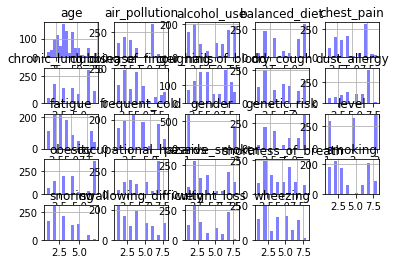

In [65]:
df.hist(color='blue', alpha=0.5, bins=16)

In [66]:
# Define the model parameters 
# We are fixing the random state so that the results are reproducible and consistent.
parameters = {"max_depth":6,'min_samples_leaf': 50,'random_state':42}

for x in [10,20,30,40,50,60,70,80,90,100,110,120]:
    # Train and evaluate the model
    trained_Classifier = train_score_Classifier(sklearn_Classifier=DecisionTreeClassifier,
                                              X_train=X_train, 
                                              y_train=y_train, 
                                              X_test=X_test, 
                                              y_test=y_test, 
                                              model_parameters={"max_depth":6,'min_samples_leaf': x,'random_state':42})
    print("\n")

Train score: 0.9825
Test score:  0.9750


Train score: 0.9800
Test score:  0.9800


Train score: 0.9250
Test score:  0.9050


Train score: 0.9250
Test score:  0.9050


Train score: 0.9113
Test score:  0.9100


Train score: 0.9012
Test score:  0.8950


Train score: 0.9012
Test score:  0.8950


Train score: 0.8650
Test score:  0.8350


Train score: 0.8650
Test score:  0.8350


Train score: 0.8650
Test score:  0.8350


Train score: 0.8650
Test score:  0.8350


Train score: 0.8650
Test score:  0.8350




In [67]:
# from the sklearn tree library, create image of trained decision tree
dot_data = tree.export_graphviz(trained_Classifier, out_file='tree.dot', 
                         feature_names=X_train.columns,  
                         class_names=y_train.values,  
                         filled=True, rounded=True,  
                         special_characters=True) 
# use graphviz to render the image
graph = graphviz.Source(dot_data)
graph

TypeError: can only concatenate str (not "numpy.int64") to str

<span style="color:red"> In a final report, try not to include code that isn't being used.</span>

# You will find attached tree.dot that makes us print our decision tree and a capture of it is displayed below

<img src="./images/decisionTree.png" alt="Drawing" style="width: 1000px;height=500"/>

<span style="color:red"> Great! Make sure you include text explaining the tree to prove you understand what's happening. Basically the value = [x, y, z] list represents the number of leafs in each class. The tree takes the highest voted classification as the answer. So everyone in this dataset has lung cancer? And the ones that have the highest degree are those who have coughing of blood, don't have occupational hazards, are obese, and have clubbing of finger nails. Is that right?</span>

# trained_classifier

In [68]:
tree.export_graphviz(trained_Classifier, out_file='tree.dot', feature_names=X_train.columns)

In [69]:
# Set parameters to search through - known as parameter grid
parameters = {'max_depth':[8,10,14], 
              'min_impurity_decrease': [.1,.01, 0.0],
              'min_samples_split': [10, 50, 2]}
# Initialize model
decision_Classifier= DecisionTreeClassifier(random_state=42)

# Initialize GridSearch and then fit
Classifier = GridSearchCV(decision_Classifier, parameters)
Classifier.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [8, 10, 14], 'min_impurity_decrease': [0.1, 0.01, 0.0], 'min_samples_split': [10, 50, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
# print out what GridSearchCV found to be the best parameters 
Classifier.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [71]:
# evaluate the tuned model
trained_Classifier = train_score_Classifier(sklearn_Classifier=DecisionTreeClassifier,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=Classifier.best_estimator_.get_params())

Train score: 1.0000
Test score:  1.0000


Performance that our train data and test data are similar-that's great

we will visualise how these look in a scattor plot.

<span style="color:red">In the case of having 100% on both train and test data, bootstrapping and k-fold cross validation should usually provide more reliable performance numbers. I sent code on k-folds earlier.</span>

In [72]:
# plotting a graph of the true values vs the predicted values for the training and test datasets
def plot_y_yhat_scatter(y_actual,y_predicted,train_test):
    ax = sns.regplot(x=y_actual, y=y_predicted, fit_reg=False)
    ax.set_xlabel('true values')
    ax.set_ylabel('predicted values')
    ax.set_title('Relationship between true and predicted Level of Lung cancer: '+train_test+' results')
    pass

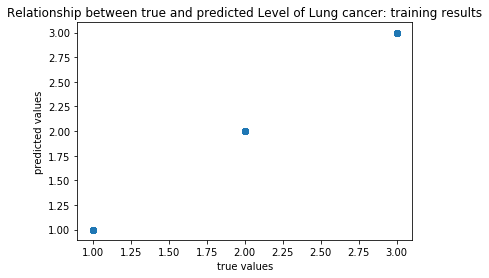

In [73]:
plot_y_yhat_scatter(y_train, trained_Classifier.predict(X_train),train_test = "training")

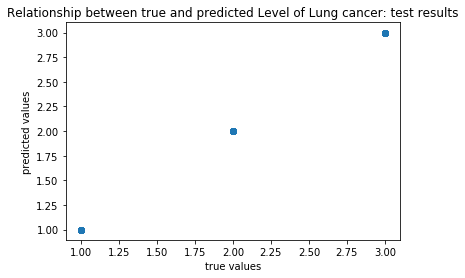

In [74]:
plot_y_yhat_scatter(y_test, trained_Classifier.predict(X_test),train_test = "test")

the relationship between our predected values and true values is high(our data is fit)

##  Feature Importance

We can look at which features are driving our model's predictions by examining the feature importance.

In [75]:
importances = trained_Classifier.feature_importances_
importances

array([0.        , 0.        , 0.06980933, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11364043,
       0.        , 0.        , 0.        , 0.41225448, 0.        ,
       0.        , 0.        , 0.26339052, 0.        , 0.02929909,
       0.        , 0.        , 0.11160615])

<pre>
0.06980933--->air_pollution 
0.11364043--->obesity
0.41225448--->coughing_of_blood 
0.26339052--->wheezing
0.02929909--->clubbing_of_finger_nails 
0.11160615--->snoring 
this are the most important features in predecting Lung cancer
<pre>

In [76]:
X.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring'],
      dtype='object')

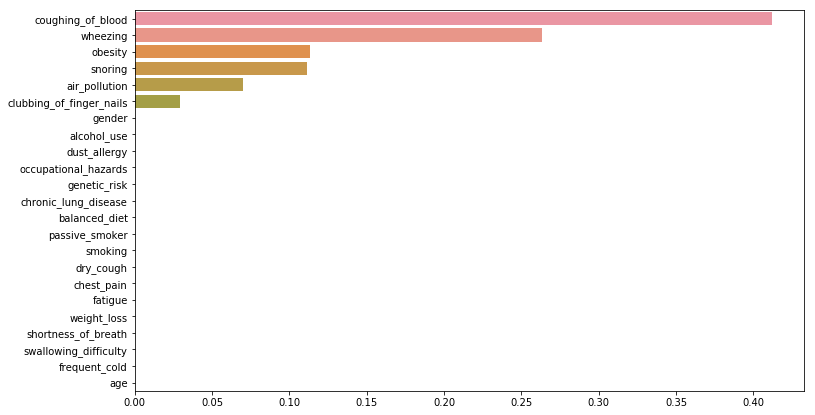

In [77]:
# Get the feature importances from our final trained model...
importances = trained_Classifier.feature_importances_

# Find the indices of the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting a bar chart of feature importances in descending order
plt.figure(figsize=(12,7))
sns.barplot(y=X_train.columns[indices],x=importances[indices]);

<span style="color:red"> Interesting that air pollution makes it to the list this time, as opposed to the tree from earlier. What are the parameters that you changed to make this happen? Why did you change the parameters?</span>

Feature ranking:
1. feature 9 (0.104505)
2. feature 13 (0.092689)
3. feature 11 (0.064121)
4. feature 8 (0.061259)
5. feature 17 (0.053987)
6. feature 3 (0.053947)
7. feature 14 (0.051066)
8. feature 18 (0.046122)
9. feature 4 (0.045952)
10. feature 10 (0.042849)
11. feature 6 (0.042549)
12. feature 2 (0.040003)
13. feature 16 (0.038493)
14. feature 22 (0.037226)
15. feature 12 (0.034225)
16. feature 19 (0.033471)
17. feature 5 (0.032807)
18. feature 7 (0.032128)
19. feature 20 (0.031667)
20. feature 15 (0.030936)
21. feature 21 (0.024520)
22. feature 0 (0.004499)
23. feature 1 (0.000979)


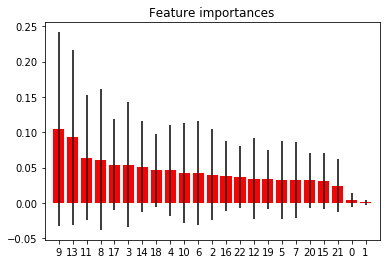

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 6. Advanced Material: Optimising the algorithm
<a id='AdvancedCV'></a>

### K-folds example for finding optimal parameters 

K-folds is a method of evaluating and tuning a model on the given dataset without overfitting to either the training dataset or the testing dataset. It finds the optimal balance between bias and variance in the model. 

Below we show how the model performs on the training and test datasets while varying the max tree depth. 

Text(0.5,0,'Max depth of the tree')

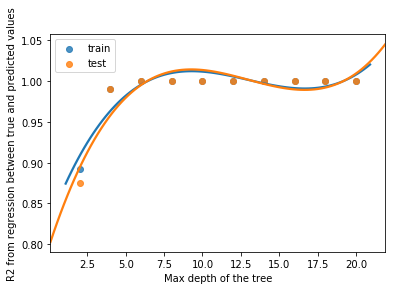

In [28]:
# define max depth range
depth_range = np.asarray(range(2,22,2))

# initialize empty arrays to store the results
scores_train = np.zeros(len(depth_range))
scores_test = np.zeros(len(depth_range))

for i in range(len(depth_range)):
    # train DTR with given max depth
    dt_Classifier = DecisionTreeClassifier(max_depth=depth_range[i], random_state=42)
    model = dt_Classifier.fit(X_train, y_train)
    # evaluate on both training and test datasets
    scores_train[i] = model.score(X_train, y_train)
    scores_test[i] = model.score(X_test, y_test)

# plot the results on the same graph
ax = sns.regplot(x=depth_range, y=scores_train, order=3, ci=None,label='train')
sns.regplot(x=depth_range, y=scores_test,order=3, ci=None, label='test', ax=ax)
ax.legend(loc='best')
ax.set_ylabel('R2 from regression between true and predicted values')
ax.set_xlabel('Max depth of the tree')

As the depth increases:
Both of training score and test score are increasing similary, we are not in the case of overfitting

This method does the following:
- Splits the dataset K equal random subsests
- Trains the data on K-1 subsets
- Evaluates performance on Kth left out subset
- Stores evaluation metric
- Repeats for K times for each random subset


In [29]:
# initialize empty array to store results
scores_cv = np.empty(len(depth_range))
for i in range(len(depth_range)):
    # initialize model
    dt_Classifier = DecisionTreeClassifier(max_depth=depth_range[i], random_state=42)
    # calculate the cross val scores. This returns an array where each element corresponds to the performance on each k-fold.
    cv_scores = cross_val_score(dt_Classifier, X_train, y_train,cv=5, n_jobs=-1)
    # calculate mean cross validation score and save
    scores_cv[i] = np.mean(cv_scores)

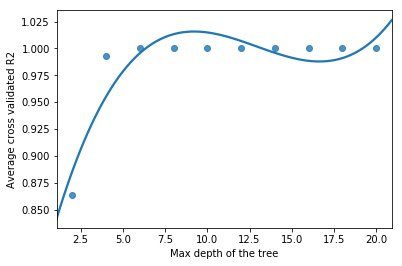

In [30]:
# plot results
ax = sns.regplot(x=depth_range, y=scores_cv, ci=None, order=3);
ax.set_xlabel('Max depth of the tree');
ax.set_ylabel('Average cross validated R2');